# Démo - scraping

## Imports

In [1]:
from bs4 import BeautifulSoup  # parser de HTML/XML
import requests  # pour la query HTTP
import pandas as pd # analyse de données, sauvegarde au format excel/CSV/JSON/Parquet etc. (on pourrait n'utiliser que la lib csv)

In [2]:
URL = "https://books.toscrape.com/"  # stockée dans une constante

# TO DO: visiter le site ci-dessus, regarder son code

## Exploration

In [35]:
r = requests.get(URL)
html = r.content
soup = BeautifulSoup(html, 'html.parser')
soup.title

<title>
    All products | Books to Scrape - Sandbox
</title>

In [39]:
soup.title.name

'title'

In [38]:
soup.title.string

'\n    All products | Books to Scrape - Sandbox\n'

In [40]:
soup.title.parent.name

'head'

In [41]:
soup.p

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [42]:
soup.p['class']

['star-rating', 'Three']

In [46]:
soup.a

<a href="index.html">Books to Scrape</a>

In [47]:
soup.find_all('a')[:3]

[<a href="index.html">Books to Scrape</a>,
 <a href="index.html">Home</a>,
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>]

## Récupérer les noms des catégories (colonne de gauche)

In [3]:
def get_categories() -> None:  # type hint
    """Capture les noms de catégories de la colonne de gauche"""
    r = requests.get(URL)
    if (rsc := r.status_code) != 200:
        print(f"Erreur, code {rsc}")
    else:
        html = r.content
        soup = BeautifulSoup(html, 'html.parser')
        categories = []
        for elem in soup.find_all('a'):
            if elem.get('href', '').startswith('catalogue/category/books/'):
                category = elem.text.strip()
                categories.append(category)
        print(f"{len(categories)} categories found:\n {categories}")

In [4]:
get_categories.__doc__

'Capture les noms de catégories de la colonne de gauche'

In [5]:
get_categories()

50 categories found:
 ['Travel', 'Mystery', 'Historical Fiction', 'Sequential Art', 'Classics', 'Philosophy', 'Romance', 'Womens Fiction', 'Fiction', 'Childrens', 'Religion', 'Nonfiction', 'Music', 'Default', 'Science Fiction', 'Sports and Games', 'Add a comment', 'Fantasy', 'New Adult', 'Young Adult', 'Science', 'Poetry', 'Paranormal', 'Art', 'Psychology', 'Autobiography', 'Parenting', 'Adult Fiction', 'Humor', 'Horror', 'History', 'Food and Drink', 'Christian Fiction', 'Business', 'Biography', 'Thriller', 'Contemporary', 'Spirituality', 'Academic', 'Self Help', 'Historical', 'Christian', 'Suspense', 'Short Stories', 'Novels', 'Health', 'Politics', 'Cultural', 'Erotica', 'Crime']


## Récupérer les titres des livres

In [8]:
def get_titles() -> list[str]:
    """Capture les titres de livres"""
    r = requests.get(URL)
    if (rsc := r.status_code) != 200:
        print(f"Erreur, code {rsc}")
    else:
        html = r.content
        soup = BeautifulSoup(html, 'html.parser')
        titles = []
        for elem in soup.find_all('h3'):
            try:
                if elem.a.get('href', '').startswith('catalogue/'):
                    titles.append(elem.a.get('title','').strip())
            except AttributeError:
                continue
        print(f"{len(titles)} titles found:\n {titles}")
        return titles

In [9]:
get_titles()

20 titles found:
 ['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind', 'The Requiem Red', 'The Dirty Little Secrets of Getting Your Dream Job', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'The Black Maria', 'Starving Hearts (Triangular Trade Trilogy, #1)', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Rip it Up and Start Again', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849', 'Libertarianism for Beginners', "It's Only the Himalayas"]


['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

## Récupérer les titres des livres **des 3 premières pages**

In [25]:
from pprint import pprint

def get_titles_multipage(page_start: int, page_end: int) -> None:
    """Capture les titres de livres de la page `page_start` à la page `page_end`"""

    # on remarque un pattern d'URL: https://books.toscrape.com/catalogue/page-2.html
    URL = 'https://books.toscrape.com/catalogue/page-{}.html'
    titles = {nb: [] for nb in range(page_start, page_end + 1)}  # or use a defaultdict(list)

    for page_nb in range(page_start, page_end + 1):
      url = URL.format(page_nb)
      print(f"Scraping {url}...")
      r = requests.get(url)
      if (rsc := r.status_code) != 200:
          print(f"Erreur, code {rsc}")
      else:
          html = r.content
          soup = BeautifulSoup(html, 'html.parser')

          for elem in soup.find_all('h3'):
              try:
                  if elem.a.get('href'):  # this time there is no "/catalogue"
                      titles[page_nb].append(elem.a.get('title','').strip())
              except AttributeError:
                  continue
    pprint(titles)

In [ ]:
get_titles_multipage(1, 3)

## Quel est le coût total des 4 premiers livres?

In [15]:
def get_prices(n_books : int = 4) -> list[float]:
    """Calcule la somme des prix des `n_books` premiers livres"""
    r = requests.get(URL)
    if (rsc := r.status_code) != 200:
        print(f"Erreur, code {rsc}")
    else:
        html = r.content
        soup = BeautifulSoup(html, 'html.parser')
        prices = []
        for elem in soup.find_all('div', class_='product_price')[:n_books]:
            try:
                prices.append(elem.p.text.strip()[1:])  # drop £ sign
            except AttributeError:
                continue
        prices = [float(val) for val in prices]  # or list(map(float, prices))
        return prices

In [16]:
prices = get_prices()
print(prices, sum(prices))

[51.77, 53.74, 50.1, 47.82] 203.43


## Stocker en local l'image de couverture de "Sapiens"

In [3]:
def store_bookcover() -> None:
    r = requests.get(URL)
    if (rsc := r.status_code) != 200:
        print(f"Erreur, code {rsc}")
    else:
        html = r.content
        soup = BeautifulSoup(html, 'html.parser')
        for elem in soup.find_all('div', class_="image_container"):
          if "sapiens" in elem.a.get('href', '').lower():
              img_url = "".join(['https://books.toscrape.com/', elem.a.img.get('src', '')])
              print(f"{img_url=}")
              img_req = requests.get(img_url)
              with open('sapiens.jpg', 'wb') as f:
                  f.write(img_req.content)
              print('Image stored successfully')
              break
        else:
          print('No bookcover from Sapiens found')

In [4]:
! ls -lt *.jpg

zsh:1: no matches found: *.jpg


In [5]:
store_bookcover()

img_url='https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg'
Image stored successfully


In [6]:
! ls -lt *.jpg

-rw-r--r-- 1 root root 7986 Sep 19 10:22 sapiens.jpg


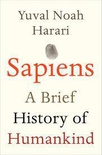

In [7]:
from IPython.display import Image

Image(filename='sapiens.jpg')

## Structurer la donnée dans un fichier CSV: titre et prix

Réutilisons les fonctions ci-dessus

### Utilisation de la librairie built-in `csv`

In [22]:
import csv

with open('books.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['titre', 'prix'])
    writer.writeheader()
    titles = get_titles()
    prices = get_prices(n_books = len(titles))
    assert len(titles) == len(prices)
    for title, price in zip(titles, prices):
          writer.writerow({'titre':title, 'prix':price})

20 titles found:
 ['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind', 'The Requiem Red', 'The Dirty Little Secrets of Getting Your Dream Job', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'The Black Maria', 'Starving Hearts (Triangular Trade Trilogy, #1)', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Rip it Up and Start Again', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849', 'Libertarianism for Beginners', "It's Only the Himalayas"]


In [23]:
! ls -lt *.csv

-rw-r--r-- 1 root root 883 Sep 19 10:37 books.csv


Regardons le résultat en ligne de commande

In [26]:
!head -n 10 books.csv

Et avec la librairie `csv`

In [29]:
with open('books.csv') as csvfile:
    reader = csv.DictReader(csvfile,)
    for row in reader:
         # row is a dict
        print(row['titre'], row['prix'])

A Light in the Attic 51.77
Tipping the Velvet 53.74
Soumission 50.1
Sharp Objects 47.82
Sapiens: A Brief History of Humankind 54.23
The Requiem Red 22.65
The Dirty Little Secrets of Getting Your Dream Job 33.34
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull 17.93
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics 22.6
The Black Maria 52.15
Starving Hearts (Triangular Trade Trilogy, #1) 13.99
Shakespeare's Sonnets 20.66
Set Me Free 17.46
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) 52.29
Rip it Up and Start Again 35.02
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 57.25
Olio 23.88
Mesaerion: The Best Science Fiction Stories 1800-1849 37.59
Libertarianism for Beginners 51.33
It's Only the Himalayas 45.17


### Utilisation de la librairie `Pandas` et réutilisation des variables  `prices` et `titles`

In [30]:
df = pd.DataFrame({'titre':titles,'prix': prices})
df.sample(5)

,titre,prix
19,It's Only the Himalayas,45.17
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
12,Set Me Free,17.46
2,Soumission,50.10


In [31]:
df.shape

(20, 2)

In [32]:
df.prix = df.prix.astype(float)
df.prix.sum()

760.97

In [33]:
df.to_csv('books_pandas.csv', index=False)

In [34]:
! ls -lt *.csv

-rw-r--r-- 1 root root 862 Sep 19 10:44 books_pandas.csv
-rw-r--r-- 1 root root 883 Sep 19 10:37 books.csv


In [35]:
pd.read_csv('books_pandas.csv')

,titre,prix
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets of Getting Your Dream...,33.34
7,The Coming Woman: A Novel Based on the Life of...,17.93
8,The Boys in the Boat: Nine Americans and Their...,22.60
9,The Black Maria,52.15
